In [ ]:
# import some packages
from __future__ import division, print_function, unicode_literals
import numpy as np
import os
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'classification'

In [1]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
    print('Saveing figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='.png', dpi=300)

In [11]:
def sort_by_target(mnist):
    recorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[recorder_train]
    mnist.target[:60000] = mnist.target[recorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    

In [12]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.uint8)
    sort_by_target(mnist)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist['data'], mnist['target']

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=uint8))

In [13]:
print('mnist data shape: ', mnist.data.shape)
print('\n')

X, y = mnist['data'], mnist['target']
print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

mnist data shape:  (70000, 784)


X.shape:  (70000, 784)
y.shape:  (70000,)


Saveing figure some_digit_plot


FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\classification\\some_digit_plot.png'

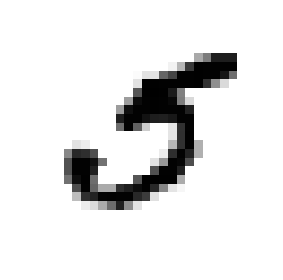

In [ ]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
save_fig('some_digit_plot')
plt.show()